In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import scanpy as sc

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


## Cell Meta

In [2]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)
cell_tidy_data.index.name = 'cell'

judge = cell_tidy_data['SubType'].apply(lambda i: 'Outlier' not in i) & (cell_tidy_data['CellClass'] != 'NonN')

cell_tidy_data = cell_tidy_data[judge].copy()

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
subtypes = pd.Index(cell_tidy_data['SubType'].unique())

## DMG

In [4]:
tf_gene_cluster = pd.read_csv('TotalHitTFID.txt', header=None, index_col=0).index
tf_gene_cluster.size

1247

## Cluster gene mC rate

In [5]:
cluster_gene_rate = xr.open_dataset(
    '/home/hanliu/project/mouse_rostral_brain/study/mCClustermCLevel/SubType.geneslop2k.mcds'
)['gene_cluster_da_rate'].load().sel({'SubType': subtypes, 
                                      'geneslop2k': tf_gene_cluster, 
                                      'mc_type': 'CHN'})


In [6]:
gene_profile = cluster_gene_rate.to_pandas()

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/xarray/core/dataarray.py:1849: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  3: pd.Panel}


## Clustering

In [7]:
adata = anndata.AnnData(X=gene_profile.T.values,
                        obs=pd.DataFrame([], index=gene_profile.columns),
                        var=pd.DataFrame([], index=gene_profile.index))

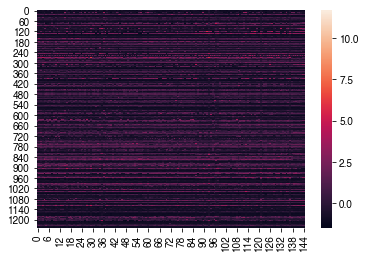

In [10]:
sns.heatmap(adata.X)

In [9]:
sc.pp.scale(adata)

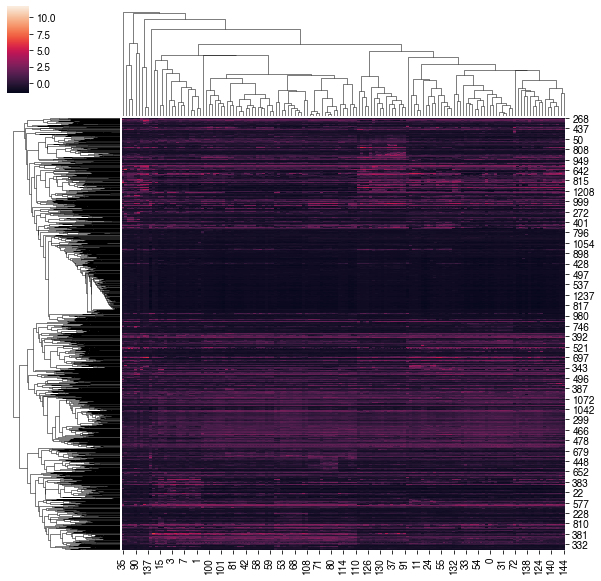

In [17]:
sns.clustermap(adata.X, metric='correlation')

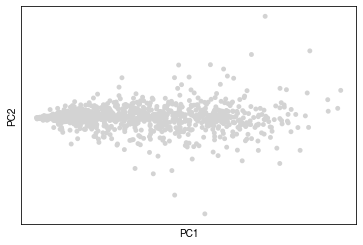

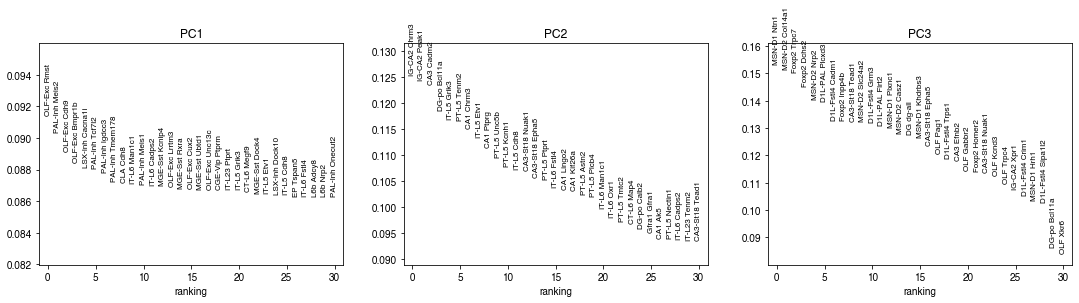

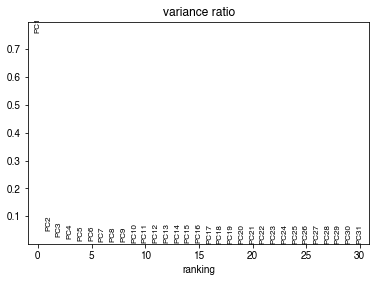

In [16]:
sc.pp.pca(adata)
sc.pl.pca_overview(adata)

In [14]:
sc.pp.neighbors(adata)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../miniconda3/envs/clustering/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../miniconda3/envs/clustering/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/hanliu/miniconda3/envs/clustering/li